## Importing contact_facts and email_events csv files. 

## Importing required modules. If we are going to use tensorflow just so that we can capture relationship among our features by using neural nets with a different activation function, then we can import those files later. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
# import pandas as pd
# import numpy as np
import hypertools as hyp
# import seaborn as sns

C:\Users\JGE6931\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

ImportError: numpy.core.multiarray failed to import

In [2]:
contact_facts = pd.read_csv('C:/Users/JGE6931/Desktop/data_challenge/contact_facts.csv')
email_facts = pd.read_csv('C:/Users/JGE6931/Desktop/data_challenge/email_events.csv')

C:\Users\JGE6931\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (136,1189,1190,1213,1352,1353,1354,1376,1406,1476,1482,1485,1486,1487,1505,1534,1546,1573,1590,1625) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## The above warning is generated through pandas as the listed columns contains data belonging to various data types. This means that going ahead I will need to explicitly mention their data type or perform some kind of conversion [mainly factorize/dummy variables]. 

## Lets view both the datasets. This helps understanding if a join is required to prepare data for modeling purposes.

In [73]:
contact_facts.head(5)

,contact_id,Media Usage Propensities: Social Influencer (Financial) Rank,Media Usage Propensities: Mobile Social Networker (Financial) Rank,Women's Petite-Casual,Women's Petite-Eveningwear,Women's Petite-Loungewear/Sleepwear,Women's Petite-Outerwear,Women's Petite-Underwear and Hosiery,Women's Plus Sizes,Women's Plus Sizes - Accessories,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
0,0,14,3,False,False,False,False,False,False,False,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
1,1,15,3,False,False,False,False,False,False,False,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
2,2,18,19,False,False,False,False,False,True,False,...,1,False,False,False,False,W - White/Other,40,X - Non-Hispanic,-1,4
3,3,0,1,False,False,False,False,False,True,False,...,3,False,False,False,False,W - White/Other,Germany,X - Non-Hispanic,-1,-1
4,4,18,19,False,False,False,False,False,False,False,...,1,False,False,False,False,W - White/Other,40,X - Non-Hispanic,2,1


In [74]:
email_facts.head(5)


,contact_id,date,persona,transmission_id,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,...,sum_unsubscribe,sum_is_bounce,sum_is_click,sum_is_delay,sum_is_delivery,sum_is_injection,sum_is_open,sum_is_spam_complaint,sum_is_unsubscribe,sum_is_implied_open
0,0,2017-12-12,GA,3.070367e+16,0001e7f32f5af126eac7,NU103,Me102,Be105-Savings,Bh118-GA,Img583-Lighting,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0,2017-12-21,GA,1.207792e+17,00062ad13b5a9a7490fc,NU101,Me104,Be111-Savings,Bh115-GA,Img652-Free Products,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0,2018-01-25,GA,6.676761e+16,000310f1695a9fccf797,NU107,Me137,Be208-Environment,Bh125-GA,Img505-Showerhead,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,2018-02-08,GA,1.748637e+17,000908667c5a1566fb12,NU101,Me102,Be105-Savings,Bh118-GA,Img582-Lighting,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0,2018-02-22,GA,1.208306e+17,0006f6da8e5a7336b99f,NU109,Me104,Be111-Savings,Bh149-GA,Img653-Free Products,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Looks like we need to join the datasets on contact_id feature.

## Before doing that, it is important to know the requirement. We need to know which contact will open an email or not based on the content items. So it is important to preserve every entry in the email_facts frame and pull all the matching records from the contacts_facts table. This could be achieved by doing a left join on contact_id column with email_facts as the left table. The eamil_facts table also contains or dependent feature[sum_is_open].  

In [3]:
result = pd.merge(email_facts,contact_facts, on = 'contact_id')

In [4]:
import hypertools as hyp


In [5]:
performance = result.pop('sum_is_open')

In [6]:
geo = hyp.plot(result,'.')

MemoryError: 

## It will be interesting to see what the resultant dataframe looks like. ie. if its size or  dimensions are drastically different from the original two datasets.

In [77]:
result.describe()

,contact_id,transmission_id,sum_bounce,sum_click,sum_delay,sum_delivery,sum_open,sum_spam_complaint,sum_unsubscribe,sum_is_bounce,...,Retail Purchase Activity Date and Category 5 Date,Economic Stability Indicator,UnderBanked Indicator,NetWorth - Gold,HeavyTransactors,Vehicle - Classic Car Owner,Home Market Value - Estimated - Actual (RP),Home Length of Residence - Actual (RP)2,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
count,468129.000000,4.676250e+05,16148.0,8221.000000,66394.000000,450688.0,97070.000000,43.0,467625.000000,467625.000000,...,468129.000000,468129.000000,468129.000000,468129.000000,468129.000000,468129.000000,468129.000000,468129.000000,468129.000000,468129.000000
mean,20007.440304,1.030593e+17,1.0,1.391437,5.471473,1.0,1.516524,1.0,0.001788,0.034532,...,77.672110,10.529613,11.460563,4.651895,7.726956,0.105550,1313.639326,2.526707,-0.203356,2.226987
std,11550.214843,4.662960e+16,0.0,1.110246,5.368797,0.0,1.730843,0.0,0.044029,0.182591,...,110.954355,8.074158,6.094577,2.985250,5.175208,4.728612,1312.996371,5.806548,1.008229,2.212082
min,0.000000,3.070367e+16,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9999.000000,6.677733e+16,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.000000,0.000000,...,-1.000000,4.000000,8.000000,3.000000,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,20014.000000,1.028357e+17,1.0,1.000000,3.000000,1.0,1.000000,1.0,0.000000,0.000000,...,-1.000000,10.000000,13.000000,5.000000,8.000000,-1.000000,1121.000000,-1.000000,0.000000,4.000000
75%,30011.000000,1.388960e+17,1.0,1.000000,8.000000,1.0,2.000000,1.0,0.000000,0.000000,...,219.000000,17.000000,17.000000,7.000000,12.000000,-1.000000,2337.000000,4.000000,0.000000,4.000000
max,39999.000000,1.749443e+17,1.0,30.000000,28.000000,1.0,136.000000,1.0,6.000000,1.000000,...,272.000000,29.000000,19.000000,10.000000,19.000000,23.000000,4648.000000,47.000000,4.000000,4.000000


In [78]:
email_facts.describe()

,contact_id,transmission_id,sum_bounce,sum_click,sum_delay,sum_delivery,sum_open,sum_spam_complaint,sum_unsubscribe,sum_is_bounce,sum_is_click,sum_is_delay,sum_is_delivery,sum_is_injection,sum_is_open,sum_is_spam_complaint,sum_is_unsubscribe,sum_is_implied_open
count,468129.000000,4.676250e+05,16148.0,8221.000000,66394.000000,450688.0,97070.000000,43.0,467625.000000,467625.000000,467625.00000,467625.000000,467625.000000,467625.0,467625.000000,467625.000000,467625.000000,467625.000000
mean,20007.440304,1.030593e+17,1.0,1.391437,5.471473,1.0,1.516524,1.0,0.001788,0.034532,0.01758,0.141981,0.963781,1.0,0.207581,0.000092,0.001734,0.209144
std,11550.214843,4.662960e+16,0.0,1.110246,5.368797,0.0,1.730843,0.0,0.044029,0.182591,0.13142,0.349031,0.186835,0.0,0.405575,0.009589,0.041609,0.406698
min,0.000000,3.070367e+16,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,9999.000000,6.677733e+16,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.000000,0.000000,0.00000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,20014.000000,1.028357e+17,1.0,1.000000,3.000000,1.0,1.000000,1.0,0.000000,0.000000,0.00000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,30011.000000,1.388960e+17,1.0,1.000000,8.000000,1.0,2.000000,1.0,0.000000,0.000000,0.00000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
max,39999.000000,1.749443e+17,1.0,30.000000,28.000000,1.0,136.000000,1.0,6.000000,1.000000,1.00000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [79]:
contact_facts.describe()

,contact_id,Media Usage Propensities: Social Influencer (Financial) Rank,Media Usage Propensities: Mobile Social Networker (Financial) Rank,RFM - Number of Orders - Apparel - General,RFM - Number of Orders - Apparel - Men's Big & Tall,RFM - Number of Orders - Apparel - Children,RFM - Number of Orders - Apparel - Teenagers,RFM - Number of Orders - Apparel - Men,RFM - Number of Orders - Apparel - Women's Petite Sizes,RFM - Number of Orders - Apparel - Women's plus Sizes,...,Retail Purchase Activity Date and Category 5 Date,Economic Stability Indicator,UnderBanked Indicator,NetWorth - Gold,HeavyTransactors,Vehicle - Classic Car Owner,Home Market Value - Estimated - Actual (RP),Home Length of Residence - Actual (RP)2,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,11.794575,12.843500,0.271275,-0.906675,-0.920225,-0.909975,-0.679175,-0.985700,-0.894325,...,77.501625,10.498300,11.437325,4.645725,7.695575,0.097100,1311.399775,2.508925,-0.204075,2.224300
std,11547.14972,6.856862,8.014644,3.941005,0.825883,0.827181,0.700559,1.377568,0.215863,0.973618,...,110.888025,8.077628,6.111207,2.993533,5.181479,4.711754,1314.860814,5.799022,1.007821,2.213766
min,0.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9999.75000,6.000000,5.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,4.000000,8.000000,3.000000,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,19999.50000,14.000000,19.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,10.000000,13.000000,5.000000,8.000000,-1.000000,1121.000000,-1.000000,0.000000,4.000000
75%,29999.25000,18.000000,19.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,219.000000,17.000000,17.000000,7.000000,12.000000,-1.000000,2337.000000,4.000000,0.000000,4.000000
max,39999.00000,19.000000,19.000000,92.000000,34.000000,40.000000,21.000000,41.000000,10.000000,39.000000,...,272.000000,29.000000,19.000000,10.000000,19.000000,23.000000,4648.000000,47.000000,4.000000,4.000000


In [80]:
print(contact_facts.shape)
print(email_facts.shape)
print(result.shape)

(40000, 1654)
(468129, 26)
(468129, 1679)


## So, clearly we have not lost any data/information while performing this transformation. Thats great. 

## Now will be a great time to identify the predictor variable and throw some light on cleaning up the features by looking into them.

In [81]:
result.dtypes

contact_id                                                              int64
date                                                                   object
persona                                                                object
transmission_id                                                       float64
message_id                                                             object
nudge_uid                                                              object
measure_uid                                                            object
benefit_uid                                                            object
behavior_uid                                                           object
image_uid                                                              object
sum_bounce                                                            float64
sum_click                                                             float64
sum_delay                                                       

## We will first have to work on features that are object type. This means that they have values that are from different data types.

"Sum_is_open" is the predictor variable.  

In [82]:
result.loc[:, result.dtypes == object]

,date,persona,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,PC Internet Connection Type,Business Owner,...,Personicx Lifestage Insurance Group Code Precision Level,Population Density IBE_Model_PersonicxPopulationDensity_2,Population Density Precision Level,Personicx Digital Cluster,Personicx Digital Precision Level,Personicx Digital Groups Groups,Personicx Digital Groups Precision Level,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference
0,2017-12-12,GA,0001e7f32f5af126eac7,NU103,Me102,Be105-Savings,Bh118-GA,Img583-Lighting,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
1,2017-12-21,GA,00062ad13b5a9a7490fc,NU101,Me104,Be111-Savings,Bh115-GA,Img652-Free Products,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
2,2018-01-25,GA,000310f1695a9fccf797,NU107,Me137,Be208-Environment,Bh125-GA,Img505-Showerhead,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
3,2018-02-08,GA,000908667c5a1566fb12,NU101,Me102,Be105-Savings,Bh118-GA,Img582-Lighting,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
4,2018-02-22,GA,0006f6da8e5a7336b99f,NU109,Me104,Be111-Savings,Bh149-GA,Img653-Free Products,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
5,2018-03-08,GA,00030f50a15a3715ee82,NU110,Me136,Be202-Savings,Bh144-GA,Img610-Furnace Filter,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
6,2018-03-22,GA,000315b8b35a7c5d3183,NU110,Me119,Be148-Savings,Bh144-GA,Img560-High Efficiency Heating System,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
7,2018-04-05,GA,0007082cc65aa60c3cb2,NU102,Me102,Be108-Savings,Bh119-GA,Img585-LED,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
8,2018-04-19,GA,0005e0a0d85a812d7038,NU110,Me104,Be111-Savings,Bh112-GA,Img652-Free Products,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
9,2018-05-03,GA,00019c1beb5a89101738,NU109,Me137,Be207-Savings,Bh119-GA,Img505-Showerhead,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic


## This is where we will start preparing the dataset to feed it into a model. First, the data field can be just substituted by its respective month/week/time of day etc...[optional]. Considering the requirement, it is more important to focus on email content, however, date field could help us visualize which type of emails are opened the most in which month/week/day of the year. 

result['date'] = result['date'].astype(str)

isValidD = True
for i in range(len(result)):
    if result.iloc[i,1] is None:
        i+=1
    try:
        datee = datetime.datetime.strptime(result.iloc[i,1], "%Y-%m-%d")
    
    except ValueError :
        isValidD = False
    
    if isValidD == False:
        i+=1
    else:
        result.iloc[i,1] = datee.month
        
    




## The code snippet replaces every date by its respective month. Please note that one can do that using this snippet but I have left the dates the way they are. 

In [14]:
result.tail(5)

,contact_id,date,persona,transmission_id,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
468124,39999,2018-04-05,GA,1.749041e+17,0009062cc65a64c81faf,NU110,Me102,Be108-Savings,Bh148-GA,Img587-LED,...,1,False,False,False,False,W - White/Other,40,X - Non-Hispanic,0,4
468125,39999,2018-04-19,GA,1.388850e+17,0007fca0d85a5a88f73d,NU102,Me104,Be111-Savings,Bh119-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,40,X - Non-Hispanic,0,4
468126,39999,2018-05-03,GA,6.683838e+16,0003b41beb5a1074e4da,NU102,Me137,Be207-Savings,Bh111-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,40,X - Non-Hispanic,0,4
468127,39999,2018-05-17,GA,8.486284e+16,0004e08afd5a395a87cc,NU105,Me141,Be220-Savings,Bh149-GA,Img518-Smart Thermostat,...,1,False,False,False,False,W - White/Other,40,X - Non-Hispanic,0,4
468128,39999,2018-05-31,GA,1.209011e+17,00066d00105b1200d829,NU102,Me129,Be179-Comfort,Bh121-GA,Img520-Seal Air and Add Insulation,...,1,False,False,False,False,W - White/Other,40,X - Non-Hispanic,0,4


In [83]:
result.columns.get_loc("date")

1

In [16]:
result['date'].head(5)

0    2017-12-12
1    2017-12-21
2    2018-01-25
3    2018-02-08
4    2018-02-22
Name: date, dtype: object

Awesome

In [17]:
result["date"] = result["date"].astype('category') # not required -- just seeing if a category works the same way as an object type.

In [18]:
result['persona'].describe()

count     467625
unique         5
top           GA
freq      180125
Name: persona, dtype: object

In [85]:
result[result.message_id.notnull() & result.nudge_uid.notnull() & result.measure_uid.notnull() & 
      result.benefit_uid.notnull() & result.behavior_uid.notnull() & result.image_uid.notnull() & result.sum_is_open.notnull()]

,contact_id,date,persona,transmission_id,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
0,0,2017-12-12,GA,3.070367e+16,0001e7f32f5af126eac7,NU103,Me102,Be105-Savings,Bh118-GA,Img583-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
1,0,2017-12-21,GA,1.207792e+17,00062ad13b5a9a7490fc,NU101,Me104,Be111-Savings,Bh115-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
2,0,2018-01-25,GA,6.676761e+16,000310f1695a9fccf797,NU107,Me137,Be208-Environment,Bh125-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
3,0,2018-02-08,GA,1.748637e+17,000908667c5a1566fb12,NU101,Me102,Be105-Savings,Bh118-GA,Img582-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
4,0,2018-02-22,GA,1.208306e+17,0006f6da8e5a7336b99f,NU109,Me104,Be111-Savings,Bh149-GA,Img653-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
5,0,2018-03-08,GA,6.679695e+16,00030f50a15a3715ee82,NU110,Me136,Be202-Savings,Bh144-GA,Img610-Furnace Filter,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
6,0,2018-03-22,GA,6.680692e+16,000315b8b35a7c5d3183,NU110,Me119,Be148-Savings,Bh144-GA,Img560-High Efficiency Heating System,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
7,0,2018-04-05,GA,1.388712e+17,0007082cc65aa60c3cb2,NU102,Me102,Be108-Savings,Bh119-GA,Img585-LED,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
8,0,2018-04-19,GA,1.028562e+17,0005e0a0d85a812d7038,NU110,Me104,Be111-Savings,Bh112-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
9,0,2018-05-03,GA,3.080958e+16,00019c1beb5a89101738,NU109,Me137,Be207-Savings,Bh119-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4


## So if we see the rows that do not have null values in the eamil content fields and our outcome varaible, we get 467625. Thats great.  

In [20]:
468129 - 467625

504

## It is important to visualize data based on the requirement. Filtering the dataset, it can be observed that there are 504 rows where are main cohort of features is null. Although this will not help, we will keep them in the dataset as some models need to learn the presence of null values. This will also help if the test dataset has null values in it. 

## We continue with treating/formatting/fixing a few other features. 

## While curating my training set, it just struck me that since this is supervised learning, we cannot have missing values in our dependent variable. Hence we may have to eliminate the rows that have a missing value in our dependent variable. They do not provide any knowledge.

In [86]:
result['sum_is_open'].isnull().sum()

504

In [87]:
result['sum_is_open'].replace('', np.nan, inplace=True)
result.dropna(subset=['sum_is_open'], inplace=True)

# Drop null fields.

In [88]:
result

,contact_id,date,persona,transmission_id,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
0,0,2017-12-12,GA,3.070367e+16,0001e7f32f5af126eac7,NU103,Me102,Be105-Savings,Bh118-GA,Img583-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
1,0,2017-12-21,GA,1.207792e+17,00062ad13b5a9a7490fc,NU101,Me104,Be111-Savings,Bh115-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
2,0,2018-01-25,GA,6.676761e+16,000310f1695a9fccf797,NU107,Me137,Be208-Environment,Bh125-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
3,0,2018-02-08,GA,1.748637e+17,000908667c5a1566fb12,NU101,Me102,Be105-Savings,Bh118-GA,Img582-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
4,0,2018-02-22,GA,1.208306e+17,0006f6da8e5a7336b99f,NU109,Me104,Be111-Savings,Bh149-GA,Img653-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
5,0,2018-03-08,GA,6.679695e+16,00030f50a15a3715ee82,NU110,Me136,Be202-Savings,Bh144-GA,Img610-Furnace Filter,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
6,0,2018-03-22,GA,6.680692e+16,000315b8b35a7c5d3183,NU110,Me119,Be148-Savings,Bh144-GA,Img560-High Efficiency Heating System,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
7,0,2018-04-05,GA,1.388712e+17,0007082cc65aa60c3cb2,NU102,Me102,Be108-Savings,Bh119-GA,Img585-LED,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
8,0,2018-04-19,GA,1.028562e+17,0005e0a0d85a812d7038,NU110,Me104,Be111-Savings,Bh112-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
9,0,2018-05-03,GA,3.080958e+16,00019c1beb5a89101738,NU109,Me137,Be207-Savings,Bh119-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4


## Moving further, it is important to observe that our main goal is to prepare dataset for a predictive model. Hence the result data frame now contains features that provide information about what happened after the email has been sent. Barring our outcome variable we should eliminate those fields. 

In [89]:
result.dtypes

contact_id                                                              int64
date                                                                   object
persona                                                                object
transmission_id                                                       float64
message_id                                                             object
nudge_uid                                                              object
measure_uid                                                            object
benefit_uid                                                            object
behavior_uid                                                           object
image_uid                                                              object
sum_bounce                                                            float64
sum_click                                                             float64
sum_delay                                                       

## You can see that these are now eliminated and we can continue to fix a few features before going on make a model. 

## This has cleaned up all the features in the email_facts file. 

In [90]:
result.loc[:, result.dtypes == object]

,date,persona,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,PC Internet Connection Type,Business Owner,...,Personicx Lifestage Insurance Group Code Precision Level,Population Density IBE_Model_PersonicxPopulationDensity_2,Population Density Precision Level,Personicx Digital Cluster,Personicx Digital Precision Level,Personicx Digital Groups Groups,Personicx Digital Groups Precision Level,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference
0,2017-12-12,GA,0001e7f32f5af126eac7,NU103,Me102,Be105-Savings,Bh118-GA,Img583-Lighting,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
1,2017-12-21,GA,00062ad13b5a9a7490fc,NU101,Me104,Be111-Savings,Bh115-GA,Img652-Free Products,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
2,2018-01-25,GA,000310f1695a9fccf797,NU107,Me137,Be208-Environment,Bh125-GA,Img505-Showerhead,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
3,2018-02-08,GA,000908667c5a1566fb12,NU101,Me102,Be105-Savings,Bh118-GA,Img582-Lighting,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
4,2018-02-22,GA,0006f6da8e5a7336b99f,NU109,Me104,Be111-Savings,Bh149-GA,Img653-Free Products,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
5,2018-03-08,GA,00030f50a15a3715ee82,NU110,Me136,Be202-Savings,Bh144-GA,Img610-Furnace Filter,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
6,2018-03-22,GA,000315b8b35a7c5d3183,NU110,Me119,Be148-Savings,Bh144-GA,Img560-High Efficiency Heating System,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
7,2018-04-05,GA,0007082cc65aa60c3cb2,NU102,Me102,Be108-Savings,Bh119-GA,Img585-LED,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
8,2018-04-19,GA,0005e0a0d85a812d7038,NU110,Me104,Be111-Savings,Bh112-GA,Img652-Free Products,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic
9,2018-05-03,GA,00019c1beb5a89101738,NU109,Me137,Be207-Savings,Bh119-GA,Img505-Showerhead,0,0,...,3,Smaller Suburbs or Towns - HHs/sq mile 571 - 925,E Census Block Group Match,10 Resolute Shoppers,1,02H Constant Connections,1,W - White/Other,England,X - Non-Hispanic


In [27]:
result

,contact_id,date,persona,transmission_id,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
0,0,2017-12-12,GA,3.070367e+16,0001e7f32f5af126eac7,NU103,Me102,Be105-Savings,Bh118-GA,Img583-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
1,0,2017-12-21,GA,1.207792e+17,00062ad13b5a9a7490fc,NU101,Me104,Be111-Savings,Bh115-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
2,0,2018-01-25,GA,6.676761e+16,000310f1695a9fccf797,NU107,Me137,Be208-Environment,Bh125-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
3,0,2018-02-08,GA,1.748637e+17,000908667c5a1566fb12,NU101,Me102,Be105-Savings,Bh118-GA,Img582-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
4,0,2018-02-22,GA,1.208306e+17,0006f6da8e5a7336b99f,NU109,Me104,Be111-Savings,Bh149-GA,Img653-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
5,0,2018-03-08,GA,6.679695e+16,00030f50a15a3715ee82,NU110,Me136,Be202-Savings,Bh144-GA,Img610-Furnace Filter,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
6,0,2018-03-22,GA,6.680692e+16,000315b8b35a7c5d3183,NU110,Me119,Be148-Savings,Bh144-GA,Img560-High Efficiency Heating System,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
7,0,2018-04-05,GA,1.388712e+17,0007082cc65aa60c3cb2,NU102,Me102,Be108-Savings,Bh119-GA,Img585-LED,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
8,0,2018-04-19,GA,1.028562e+17,0005e0a0d85a812d7038,NU110,Me104,Be111-Savings,Bh112-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
9,0,2018-05-03,GA,3.080958e+16,00019c1beb5a89101738,NU109,Me137,Be207-Savings,Bh119-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4


## Starting to make a binary classification model. We will fix a few features as and when we get errors or need to fine tune and improve model characteristics. 

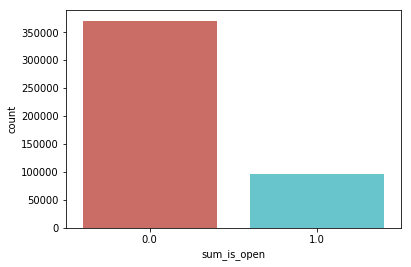

In [91]:
import seaborn as sb
sb.countplot(x='sum_is_open',data=result, palette='hls')
plt.show()

## This confirms that our predictor variable is binary.

## Now lets check for missing values just to make sure one more time.

In [92]:
result.isnull().sum()

contact_id                                                                 0
date                                                                       0
persona                                                                    0
transmission_id                                                            0
message_id                                                                 0
nudge_uid                                                                  0
measure_uid                                                                0
benefit_uid                                                                0
behavior_uid                                                               0
image_uid                                                                  0
sum_bounce                                                            451477
sum_click                                                             459404
sum_delay                                                             401231

In [30]:
result.dtypes

contact_id                                                               int64
date                                                                  category
persona                                                               category
transmission_id                                                       category
message_id                                                            category
nudge_uid                                                             category
measure_uid                                                           category
benefit_uid                                                           category
behavior_uid                                                          category
image_uid                                                             category
sum_bounce                                                             float64
sum_click                                                              float64
sum_delay                                           

In [93]:
dff = pd.DataFrame(pd.isnull(result).sum().to_frame('nulls'))

In [32]:
dff.head(5)

,nulls
contact_id,0
date,0
persona,0
transmission_id,0
message_id,0


In [94]:
dff[dff['nulls'] > 10]

,nulls
sum_bounce,451477
sum_click,459404
sum_delay,401231
sum_delivery,16937
sum_open,370555
sum_spam_complaint,467582


## Looks like we do not have any more null values in our dataset after deleteing the above.

In [34]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467625 entries, 0 to 468128
Columns: 1679 entries, contact_id to RFM Catalog Buyer Recency - Input Individual
dtypes: bool(976), category(9), float64(16), int64(431), object(247)
memory usage: 2.9+ GB


In [35]:
result.head(5)

,contact_id,date,persona,transmission_id,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
0,0,2017-12-12,GA,3.070367e+16,0001e7f32f5af126eac7,NU103,Me102,Be105-Savings,Bh118-GA,Img583-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
1,0,2017-12-21,GA,1.207792e+17,00062ad13b5a9a7490fc,NU101,Me104,Be111-Savings,Bh115-GA,Img652-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
2,0,2018-01-25,GA,6.676761e+16,000310f1695a9fccf797,NU107,Me137,Be208-Environment,Bh125-GA,Img505-Showerhead,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
3,0,2018-02-08,GA,1.748637e+17,000908667c5a1566fb12,NU101,Me102,Be105-Savings,Bh118-GA,Img582-Lighting,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4
4,0,2018-02-22,GA,1.208306e+17,0006f6da8e5a7336b99f,NU109,Me104,Be111-Savings,Bh149-GA,Img653-Free Products,...,1,False,False,False,False,W - White/Other,England,X - Non-Hispanic,0,4


## As contact_id and transmission_id do not seem to be relevant predictors, we can get rid of them 


In [95]:
del result['contact_id']
del result['transmission_id']
del result['sum_bounce']
del result['sum_click']
del result['sum_open']
del result['sum_delay']
del result['sum_delivery']
del result['sum_spam_complaint']

In [96]:
result.dtypes

date                                                                   object
persona                                                                object
message_id                                                             object
nudge_uid                                                              object
measure_uid                                                            object
benefit_uid                                                            object
behavior_uid                                                           object
image_uid                                                              object
sum_unsubscribe                                                       float64
sum_is_bounce                                                         float64
sum_is_click                                                          float64
sum_is_delay                                                          float64
sum_is_delivery                                                 

In [97]:
del result['sum_unsubscribe']
del result['sum_is_bounce']
del result['sum_is_delay']
del result['sum_is_delivery']
del result['sum_is_click']
del result['sum_is_unsubscribe']
del result['sum_is_injection']
del result['sum_is_spam_complaint']

In [98]:
result.dtypes

date                                                                   object
persona                                                                object
message_id                                                             object
nudge_uid                                                              object
measure_uid                                                            object
benefit_uid                                                            object
behavior_uid                                                           object
image_uid                                                              object
sum_is_open                                                           float64
sum_is_implied_open                                                   float64
Media Usage Propensities: Social Influencer (Financial) Rank            int64
Media Usage Propensities: Mobile Social Networker (Financial) Rank      int64
Women's Petite-Casual                                           

In [99]:
result_preserve = pd.DataFrame(result)

# preserving cleaned dataframe. 

In [102]:
result = result_preserve

In [105]:
# result.columns.get_loc("sum_is_open")
Y = result.ix[:,8].values
Y

array([ 0.,  1.,  0., ...,  0.,  0.,  0.])

In [106]:
del result["sum_is_open"]
del result["sum_is_implied_open"]

In [107]:
result.dtypes

date                                                                   int64
persona                                                                int64
message_id                                                             int64
nudge_uid                                                              int64
measure_uid                                                            int64
benefit_uid                                                            int64
behavior_uid                                                           int64
image_uid                                                              int64
Media Usage Propensities: Social Influencer (Financial) Rank           int64
Media Usage Propensities: Mobile Social Networker (Financial) Rank     int64
Women's Petite-Casual                                                   bool
Women's Petite-Eveningwear                                              bool
Women's Petite-Loungewear/Sleepwear                                     bool

In [108]:
char_cols = result.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping1 = {}

for c in char_cols:
    result[c], label_mapping1[c] = pd.factorize(result[c])

## Factorize all object features and make a dictionary for backtracking.

In [109]:
result

,date,persona,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,Media Usage Propensities: Social Influencer (Financial) Rank,Media Usage Propensities: Mobile Social Networker (Financial) Rank,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
0,0,0,0,0,0,0,0,0,14,3,...,0,False,False,False,False,0,0,0,0,4
1,1,0,1,1,1,1,1,1,14,3,...,0,False,False,False,False,0,0,0,0,4
2,2,0,2,2,2,2,2,2,14,3,...,0,False,False,False,False,0,0,0,0,4
3,3,0,3,1,0,0,0,3,14,3,...,0,False,False,False,False,0,0,0,0,4
4,4,0,4,3,1,1,3,4,14,3,...,0,False,False,False,False,0,0,0,0,4
5,5,0,5,4,3,3,4,5,14,3,...,0,False,False,False,False,0,0,0,0,4
6,6,0,6,4,4,4,4,6,14,3,...,0,False,False,False,False,0,0,0,0,4
7,7,0,7,5,0,5,5,7,14,3,...,0,False,False,False,False,0,0,0,0,4
8,8,0,8,4,1,1,6,1,14,3,...,0,False,False,False,False,0,0,0,0,4
9,9,0,9,3,2,6,5,2,14,3,...,0,False,False,False,False,0,0,0,0,4


In [110]:
char_cols = result.dtypes.pipe(lambda x: x[x == 'bool']).index
label_mapping3 = {}

for c in char_cols:
    result[c], label_mapping3[c] = pd.factorize(result[c])

## Factorize all boolean features and make a dictionary for backtracking.

In [111]:
result.tail(5)

,date,persona,message_id,nudge_uid,measure_uid,benefit_uid,behavior_uid,image_uid,Media Usage Propensities: Social Influencer (Financial) Rank,Media Usage Propensities: Mobile Social Networker (Financial) Rank,...,Personicx Digital Groups Precision Level,Family Ties: Potential Inheritor - Input Individual,Family Ties: Adult w/Senior Parent - Input Individual,Family Ties: Adult w/Wealthy Parent - Input Individual,Family Ties: Relatives Info Available - Input Individual,Race Code (Low Detail),Country of Origin (High Detail),Hispanic Language Preference,RFM Catalog Buyer Frequency - Input Individual,RFM Catalog Buyer Recency - Input Individual
468124,7,0,467620,4,0,5,55,14,7,0,...,0,0,0,0,0,0,1,0,0,4
468125,8,0,467621,5,1,1,5,1,7,0,...,0,0,0,0,0,0,1,0,0,4
468126,9,0,467622,5,2,6,25,2,7,0,...,0,0,0,0,0,0,1,0,0,4
468127,10,0,467623,6,5,7,3,21,7,0,...,0,0,0,0,0,0,1,0,0,4
468128,11,0,467624,5,6,22,53,20,7,0,...,0,0,0,0,0,0,1,0,0,4


Looks like our training dataset is close to ready! Awesome!

result.head(25)

In [113]:
result.isnull().values.any()

False

In [115]:
len(Y)

467625

In [117]:
X = result.ix[:,0:1660].values
len(X)

467625

## Awesome X and Y both are same length. Now we can make a binary classification model. 

# 1. Logistic Regression 

In [118]:
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = .2)

In [120]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
Y_pred = LogReg.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y_pred)
confusion_matrix

array([[74099,    30],
       [19362,    34]], dtype=int64)

## From the above confusion matrix, we can see that 74090 and 34 are correct predictions while 30 and 19362 are incorrect predictions. 

## Remember our testing data size was 20% of 467625 i.e. 93525. So we got 74099/93525 correct predictions. Thats good, however, considering that our main class is '0' which is about 77 % of the data, our model must do better than this threshold value[which it does]. This proves that data cleaning and standardization has helped achieve better reuslts. Cool! lets try and improve our accuracy.  

In [124]:
print(classification_report(y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88     74129
        1.0       0.53      0.00      0.00     19396

avg / total       0.74      0.79      0.70     93525



## Accuracy of Logistic Regression Model : 79.26%

Lets try out a few more models. But before that, lets visualize the confusion matrix. 

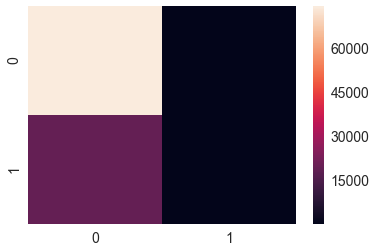

In [128]:
sb.set(font_scale=1.4)
sb.heatmap(confusion_matrix)
plt.show()

In [130]:
import pickle
filename = 'logreg_finalized_model.sav'
pickle.dump(LogReg, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [133]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [135]:
seed = 7
np.random.seed(seed)

# 2. Neural Network using TensorFLow

In [146]:
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(1000, input_dim=1660, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

'''evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
'''

## The above code snippets uses cross validation to see how a NN with 1000 hidden nodes would perform. However, considering the time contrainsts on this data challenge, it would be good to investigate moving forward later.

## Such algorithms like SGD should be implemeted by using APIs like PySark for faster processing. 

## Neural Net accuracy estimation using cross-validation. 

## We tried to use cross validation to check how  neural network with a 1000 hidden layers would behave on this data.However it did take an awful amount of time. Since LR gave us a good accuracy , we know there is aome kind of linear relationship among features and predictors.  Lets see if LASSO can help us get rid of a few unimportant features. 

'''from sklearn.linear_model import LassoLarsCV
import matplotlib.pylab as plt
model_lasso=LassoLarsCV(cv=5, precompute=False).fit(X_train,Y_train)
'''

## Lot of time to execute. Might exceed the time alloted for this challenge. However, as mentioned previously this can done using a mapreduce framework for faster processing. This is a very important step as this  could drastically improve accuracy by identifying most significant features. 

In [158]:
result.to_hdf("cleaned_data.pkl",'result',mode='w')
# df.to_hdf('my_filename.hdf','mydata',mode='w')

# df = pd.read_hdf('my_filename.hdf','mydata')

In [162]:
with open('Y.pkl', 'wb') as f:
      pickle.dump(Y, f)

# 3. Naive Bayes -- Gaussian modelling.

In [164]:
from sklearn.naive_bayes import GaussianNB

In [165]:
clf = GaussianNB()
clf.fit(X_train, Y_train)


GaussianNB(priors=None)

In [167]:
target_pred = clf.predict(X_test)

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, target_pred, normalize = True)

0.67156375300721727

## Accuracy of Naive Bayes: 67.15%. Not too impressive.

In [ ]:
clf.to_pkl("NB_model.pkl")

# 4. Random Forest 

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [174]:
RF_predicted = rf.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_predicted)

In [175]:
RF_accuracy

0.84856455493183636

# Random Forest Accuracy : 85% 

In [205]:
feature_importance = rf.feature_importances_
#print feature_importance

In [218]:
max(feature_importance)
# feature_importance
# The maximum influence of a feature towards our predictor variable is 0.087
# This shows us which features are important and which are major contributors towards a predictor variable. 

0.087046782629705083

## feature_importance gives importance[relative influence] of all the features towards the dependent variable. 

# Lets Try Extreme Tree Classifier. 5. Extra Tree Calssifier

'''from sklearn.ensemble import ExtraTreesClassifier
ex_tree_model = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
ex_tree_model.fit(X_train, Y_train)
'''

## check out the number of estimators. This might help to capture the relationship better. 

## This would also require substantial amount of time to execute. This extra tree classifer could potentailly provide great results. 

## Random Forest - Thats our best model so far !!
## Bagging technique

## We should also try a few boosting techniques. These tend to give better results than Bagging techniques. 

## Lets try Stochastic Gradient Boost[GBMs]. Before making the model we can check the accuracy just using cross validation. This is enough to judge the performance of the model.

# 6. Gradient Boosting Trees 

'''
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model_gbm = GradientBoostingClassifier(n_estimators=100, random_state=seed)
results = model_selection.cross_val_score(model_gbm, X_train, Y_train, cv=kfold)
print(results.mean())
'''

##  This is GBM model. Takes a lot of time to execute especially with more than 100 trees. Could not finish execution but definitely worth a shot. 

## Lets observe the relationship among email content features. Please not that this visualizations are produced after making a model only due to time constraints on this challenge. 

In [192]:
names = ['nudge_uid', 'measure_uid', 'benefit_uid', 'behavior_uid', 'image_uid']
data = result[names]


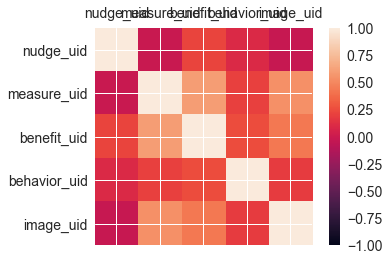

In [196]:
correlations = data.corr()
# # plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## As content of the emails is important with respect to the context of the problem, we can see the correlation among the content items. This will tell us if the any two features have the same effect on the predictor variable. Looking at the result, it is not important to eliminate any email content feature. 

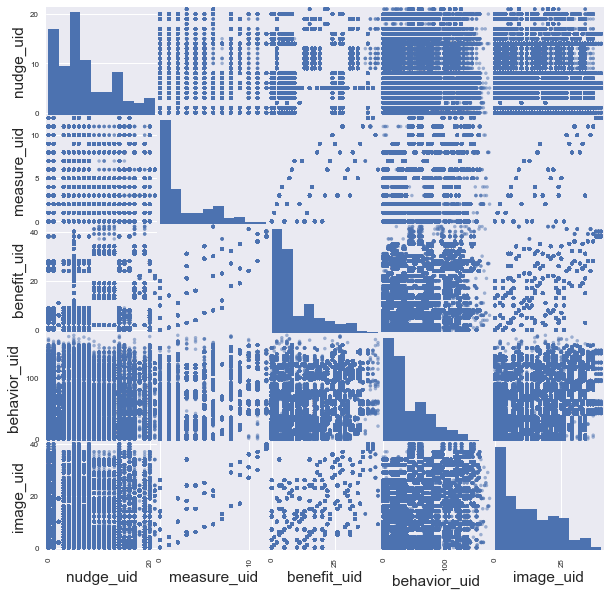

In [200]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(10,10))
plt.show()

## The scatter matrix aligns well with the correlation plot. So we definitely need all our email content features. 


# 3 hours 15 minutes. 

------------------------------------------------END-----------------------------------------------------------------------------

------------------------------------------------END-----------------------------------------------------------------------------

# Summary and Future thoughts. [Write Up][Future Work]

The dataset comprised of two tables, one providing information on the contacts and the other mainly describing the outcomes of sending each email to those contacts. It would be intersting to note that this can be joined using a left join on contact_id. The time required to curate this dataset to feed into the model took about 2 hours. The models could be made in an hour with the use of very helpful sklearn libraries. The accuaracy of all models are recorded and specified in a larger font.The factorize part was the most important and needed a dictionary to store results for backtracking. 

Although the neural nets, gbm and lasso could not be executed[due to lack of time(3 hrs)] it would be very interesting to gauge the performance of these methods. We can process this faster using pySpark. Once we obtain lasso results, we can make a much better model by removing the unimportant predictors. As the size would reduce this would also allow gbm to process faster. 

For the bigger problems, we can try all the models listed with a better processing framework. 

All the above models are capable of predicting a unseen test data with email contents and contacts information. 


### Next steps:
I would ideally spend more time in performing a few statitical tests on individual features and produce visualizations. Then move on to data curation after evaluating the raw data. All models can be fine tuned by performing additional feature selection and standardization.This can significantly better accuracy, precision and recall. If we did not have the outcome result, clustering could be used to build clusters of contacts with similar interests/habits/backgrounds too. 

Finally, to summarize this was a good dataset to work on and evaluate models. We could do a lot more in the evaluation process like AUC and logarithmic error rates. Increasing the number of trees in RF and the hidden nodes in neural nets would be great to improve accuracy. Going ahead I would use pyspark to train more complex models.

Note: Writing the summary took addtional 35 mintues.



